In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Iris Flower Dataset
https://www.kaggle.com/datasets/arshid/iris-flower-dataset

**Mitko Stoychev**

10/06/2024

## 1. Introduction

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines

**Features**:

The dataset contains a set of 150 records under 5 attributes:
1. SepalLengthCm
2. SepalWidthCm
3. PetalLengthCm
4. PetalWidthCm
5. Species

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*YYiQed4kj_EZ2qfg_imDWA.png">

## 2. Data Exploration

### 2.1. Load the data

In [2]:
data = pd.read_csv("data/iris.data.csv", header=None)
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
data.columns = cols
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### 2.2. Check for null values

In [3]:
print(data.isna().sum())

data.info()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


At first glance I can see that the dataset is very small (150 entries) and there are not any null or zero values in the dataset.

### 2.3. Check for duplicates

In [5]:
data[data.duplicated() == True]

,sepal_length,sepal_width,petal_length,petal_width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


Data is free from duplicates values. Measuring 50 flowers and repeating 1 exact measurement with such small standard deviations is likely to happen.

Conclusion: I don't have to tidy the data, nor clean it. The dataset is tidy and clean.

### 2.4. Categorical Data

In [6]:
categorical_col = data.select_dtypes(include=['object'])
print(f"The dataset has {categorical_col.shape[1]} categorical columns.")

categorical_col.head()

The dataset has 1 categorical columns.


,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


class          
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
*********************************************************************


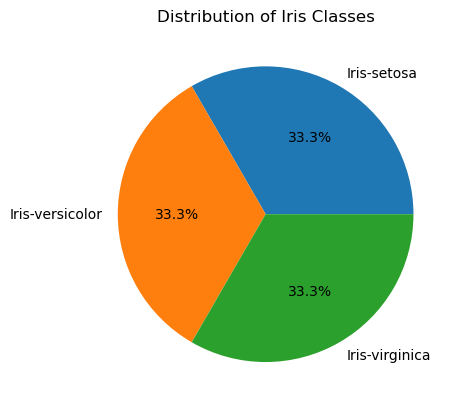

In [7]:
print(categorical_col.value_counts())
print("*********************************************************************")

class_counts = data['class'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Iris Classes')
plt.show()

### 2.5. Numerical Data

In [8]:
numerical_col = data.select_dtypes(include=["int", "float"])
print(f"The dataset has {numerical_col.shape[1]} numerical columns.")

numerical_col.head()

The dataset has 4 numerical columns.


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


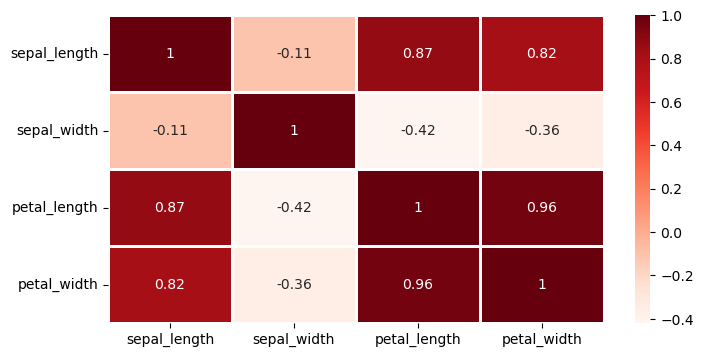

In [9]:
# decribe method
print(numerical_col.describe())

# Heatmap to check any correlations
plt.figure(figsize=(8,4))
sns.heatmap(numerical_col.corr(), annot=True, linewidth=1, cmap="Reds")
plt.show()

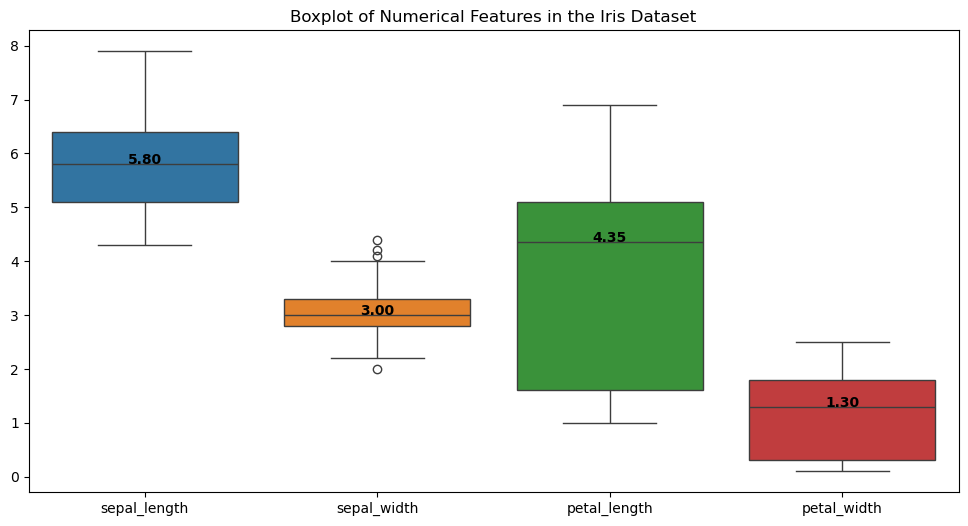

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=numerical_col)
plt.title('Boxplot of Numerical Features in the Iris Dataset')

medians = numerical_col.median()
for idx, median in enumerate(medians):
    plt.text(idx, median, f'{median:.2f}', 
             horizontalalignment='center', 
             size='medium', 
             color='black', 
             weight='semibold')
plt.show()

We can note that "Sepal Width" has some outliers.

### 2.7. Bivariate Analysis

Bivariate analysis is a statistical method used to explore the relationship between two variables simultaneously. 

It focuses on understanding how changes in one variable are associated with changes in another variable. 

#### Sepal Length

In [11]:
# GROUPING BY "class/species"
data.groupby(["class"])["sepal_length"].agg(["mean", "median", "std", "count"])

,mean,median,std,count
class,,,,
Iris-setosa,1.464,1.50,0.173511,50
Iris-versicolor,4.260,4.35,0.469911,50
Iris-virginica,5.552,5.55,0.551895,50


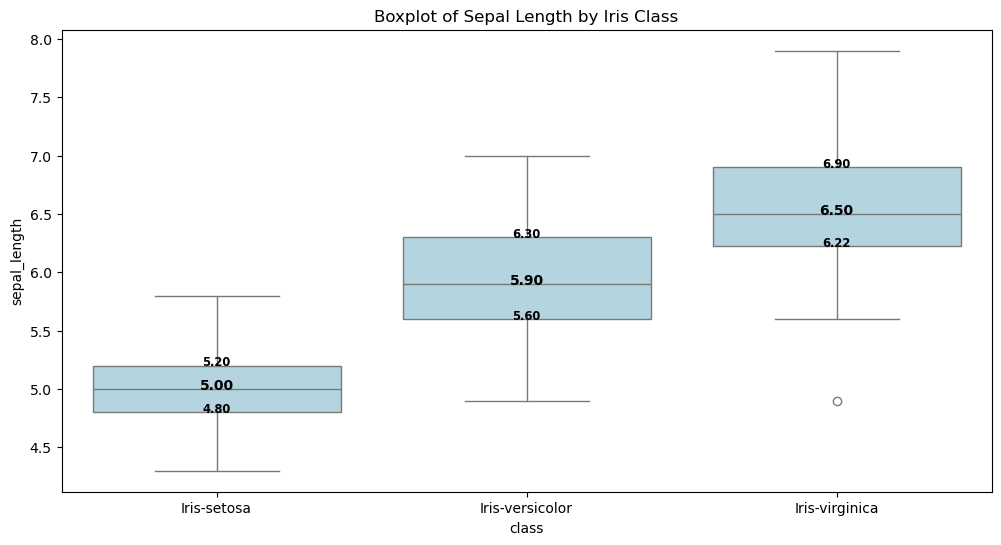

In [15]:
# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="class", y="sepal_length", color="lightblue")

# Calculate the median, Q1, and Q3 for each class
grouped = data.groupby("class")["sepal_length"]
medians = grouped.median()
q1 = grouped.quantile(0.25)
q3 = grouped.quantile(0.75)

# Annotate the median, Q1, and Q3 values on the plot
for i, class_name in enumerate(medians.index):
    plt.text(i, medians[class_name], f"{medians[class_name]:.2f}", 
             horizontalalignment="center", 
             size="medium", 
             color="black", 
             weight="semibold")
    
    plt.text(i, q1[class_name], f'{q1[class_name]:.2f}', 
             horizontalalignment="center", 
             size="small", 
             color="black", 
             weight="semibold")
    
    plt.text(i, q3[class_name], f"{q3[class_name]:.2f}", 
             horizontalalignment="center", 
             size="small", 
             color="black", 
             weight="semibold")

plt.title("Boxplot of Sepal Length by Iris Class")
plt.show()

From the above visualization, Iris-virginica has the highest average sepal length (mean: 6.588), compared to Iris-versicolor (mean: 5.936) and Iris-setosa (mean: 5.006).

The standard deviation is highest for Iris-virginica (0.635880), which indicates more variability in sepal length for this species. This could be related to the larger size of the plants, leading to more variation. It seems to be a totally natural behavior


#### Sepal Width

In [16]:
# GROUPING BY "class/species"
data.groupby(["class"])["sepal_width"].agg(["mean", "median", "std", "count"])

,mean,median,std,count
class,,,,
Iris-setosa,3.418,3.4,0.381024,50
Iris-versicolor,2.770,2.8,0.313798,50
Iris-virginica,2.974,3.0,0.322497,50


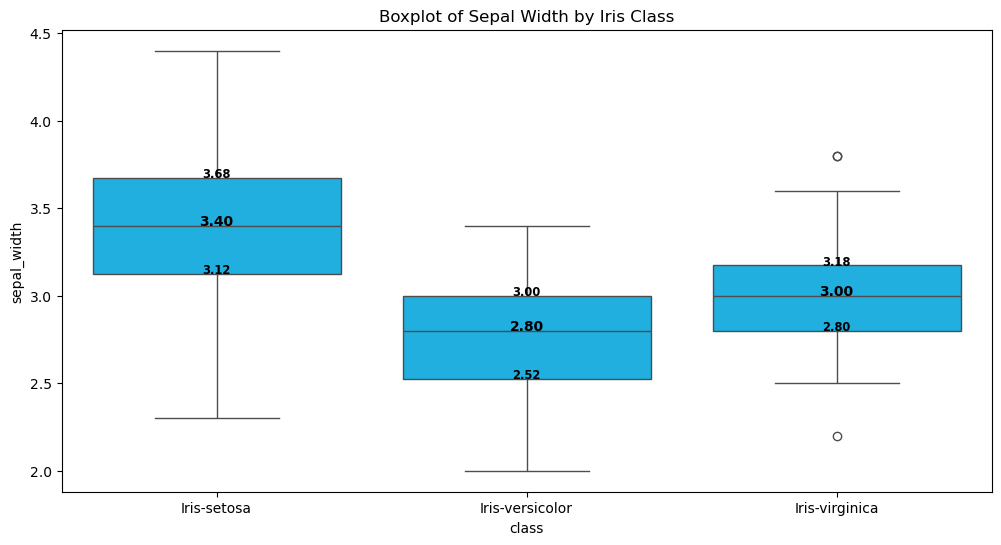

In [17]:
# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="class", y="sepal_width", color="deepskyblue")

# Calculate the median, Q1, and Q3 for each class
grouped = data.groupby("class")["sepal_width"]
medians = grouped.median()
q1 = grouped.quantile(0.25)
q3 = grouped.quantile(0.75)

# Annotate the median, Q1, and Q3 values on the plot
for i, class_name in enumerate(medians.index):
    plt.text(i, medians[class_name], f"{medians[class_name]:.2f}", 
             horizontalalignment="center", 
             size="medium", 
             color="black", 
             weight="semibold")
    
    plt.text(i, q1[class_name], f'{q1[class_name]:.2f}', 
             horizontalalignment="center", 
             size="small", 
             color="black", 
             weight="semibold")
    
    plt.text(i, q3[class_name], f"{q3[class_name]:.2f}", 
             horizontalalignment="center", 
             size="small", 
             color="black", 
             weight="semibold")

plt.title("Boxplot of Sepal Width by Iris Class")
plt.show()

From the above visualization, Iris-setosa has the highest average sepal width (mean: 3.418) compared to Iris-virginica (mean: 2.974) and Iris-versicolor (mean: 2.770). The species with the highest sepal width (Iris-setosa) is the one with the lowest sepal length. This might suggest different evolutionary adaptations for iris plants.

We also note that there is no clear correlation between sepal length and sepal width based on the mean values across the species. This suggests that sepal length and width may vary independently of each other.

As a last note, Iris Virginica is the only species that presents outliers among the measurements of the sepals.

#### Petal Length

In [18]:
# GROUPING BY "class/species"
data.groupby(["class"])["petal_length"].agg(["mean", "median", "std", "count"])

,mean,median,std,count
class,,,,
Iris-setosa,1.464,1.50,0.173511,50
Iris-versicolor,4.260,4.35,0.469911,50
Iris-virginica,5.552,5.55,0.551895,50


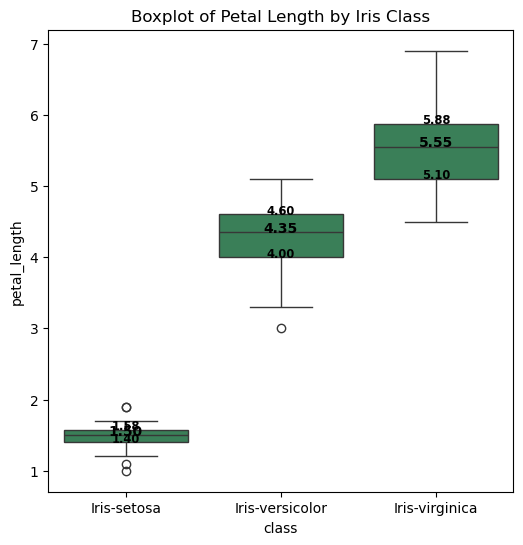

In [19]:
# Create the boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(data=data, x="class", y="petal_length", color="seagreen")

# Calculate the median, Q1, and Q3 for each class
grouped = data.groupby("class")["petal_length"]
medians = grouped.median()
q1 = grouped.quantile(0.25)
q3 = grouped.quantile(0.75)

# Annotate the median, Q1, and Q3 values on the plot
for i, class_name in enumerate(medians.index):
    plt.text(i, medians[class_name], f"{medians[class_name]:.2f}", 
             horizontalalignment="center", 
             size="medium", 
             color="black", 
             weight="semibold")
    
    plt.text(i, q1[class_name], f'{q1[class_name]:.2f}', 
             horizontalalignment="center", 
             size="small", 
             color="black", 
             weight="semibold")
    
    plt.text(i, q3[class_name], f"{q3[class_name]:.2f}", 
             horizontalalignment="center", 
             size="small", 
             color="black", 
             weight="semibold")

plt.title("Boxplot of Petal Length by Iris Class")
plt.show()

Iris-virginica has the highest average petal length (mean: 5.552) compared to Iris-versicolor (mean: 4.260) and Iris-setosa (mean: 1.464).

The standard deviation is highest for Iris-virginica (0.551895), indicating more variability in petal length for this species, likely related to the larger size of the plants. Natural behaviour similar to sepal.

#### Petal Width

In [20]:
# GROUPING BY "class/species"
data.groupby(["class"])["petal_width"].agg(["mean", "median", "std", "count"])

,mean,median,std,count
class,,,,
Iris-setosa,0.244,0.2,0.107210,50
Iris-versicolor,1.326,1.3,0.197753,50
Iris-virginica,2.026,2.0,0.274650,50


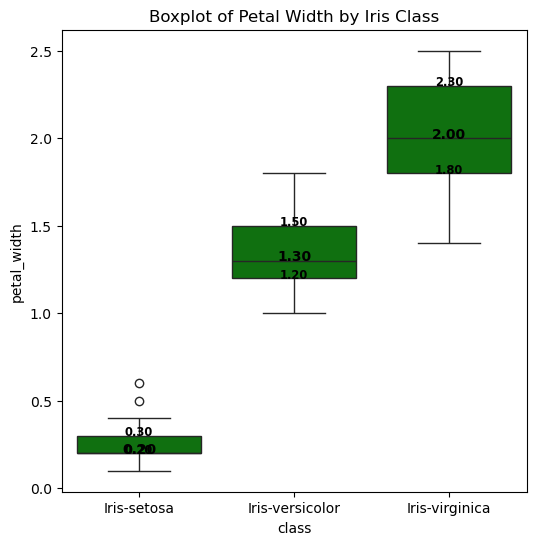

In [21]:
# Create the boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(data=data, x="class", y="petal_width", color="green")

# Calculate the median, Q1, and Q3 for each class
grouped = data.groupby("class")["petal_width"]
medians = grouped.median()
q1 = grouped.quantile(0.25)
q3 = grouped.quantile(0.75)

# Annotate the median, Q1, and Q3 values on the plot
for i, class_name in enumerate(medians.index):
    plt.text(i, medians[class_name], f"{medians[class_name]:.2f}", 
             horizontalalignment="center", 
             size="medium", 
             color="black", 
             weight="semibold")
    
    plt.text(i, q1[class_name], f'{q1[class_name]:.2f}', 
             horizontalalignment="center", 
             size="small", 
             color="black", 
             weight="semibold")
    
    plt.text(i, q3[class_name], f"{q3[class_name]:.2f}", 
             horizontalalignment="center", 
             size="small", 
             color="black", 
             weight="semibold")

plt.title("Boxplot of Petal Width by Iris Class")
plt.show()

Iris-virginica has the highest average petal width (mean: 2.026) compared to Iris-versicolor (mean: 1.326) and Iris-setosa (mean: 0.244).

The species with the highest petal width (Iris-virginica) also has the highest petal length. This might suggest a correlation between larger petal dimensions.

#### Histogram distributions

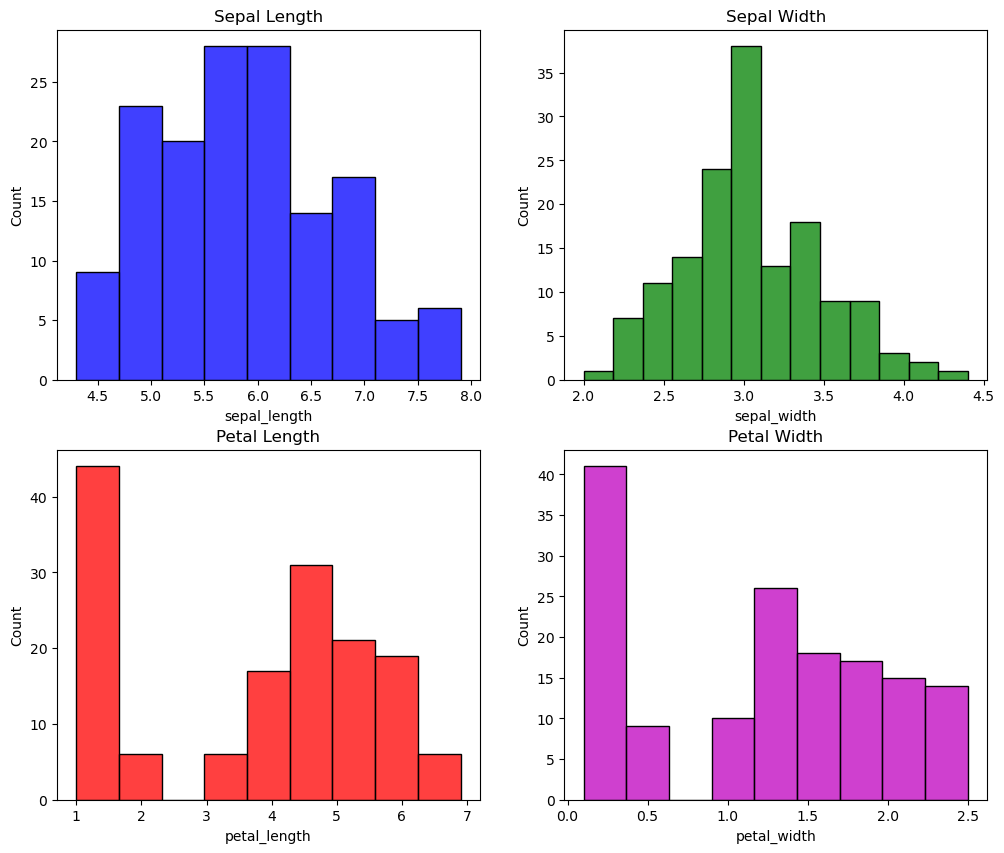

In [27]:
# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot histogram for Sepal Length
sns.histplot(data["sepal_length"], ax=axes[0, 0], color="b")
axes[0, 0].set_title("Sepal Length")

# Plot histogram for Sepal Width
sns.histplot(data["sepal_width"], ax=axes[0, 1], color="g")
axes[0, 1].set_title("Sepal Width")

# Plot histogram for Petal Length
sns.histplot(data["petal_length"], ax=axes[1, 0], color="r")
axes[1, 0].set_title("Petal Length")

# Plot histogram for Petal Width
sns.histplot(data["petal_width"], ax=axes[1, 1], color="m")
axes[1, 1].set_title("Petal Width")

plt.show()

Upon reviewing the plots above, it's evident that the distribution of Numerical Features does not follow a Gaussian distribution. 

Therefore, our next step is to transform the distribution of Numerical Features to adhere to a Gaussian distribution, before starting with the modelling.

### 2.8. Scaling the data